# Crypto Prices 

## Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Data Files

In [2]:
usdt = pd.read_csv("../data/usdt_price_data.csv")
ustc = pd.read_csv("../data/ustc_price_data.csv")
usdc = pd.read_csv("../data/usdc_price_data.csv")
pax = pd.read_csv("../data/pax_price_data.csv")
wluna = pd.read_csv("../data/wluna_price_data.csv")
dai = pd.read_csv("../data/dai_price_data.csv")

## Exploration

Dataframe dimensions

In [3]:
print(usdt.shape, ustc.shape, usdc.shape, pax.shape, wluna.shape, dai.shape)

(215, 5) (215, 5) (215, 5) (215, 5) (215, 5) (215, 5)


NaN values

In [4]:
print(usdt.isna().sum(), ustc.isna().sum(), usdc.isna().sum(), pax.isna().sum(), wluna.isna().sum(), dai.isna().sum())

timestamp    0
open         0
high         0
low          0
close        0
dtype: int64 timestamp    0
open         0
high         0
low          0
close        0
dtype: int64 timestamp    0
open         0
high         0
low          0
close        0
dtype: int64 timestamp    0
open         0
high         0
low          0
close        0
dtype: int64 timestamp    0
open         0
high         0
low          0
close        0
dtype: int64 timestamp    0
open         0
high         0
low          0
close        0
dtype: int64


Dataframe Description

In [5]:
prices = {"usdt": usdt, "usdc": usdc, "ustc": ustc, "pax": pax, "wluna": wluna, "dai": dai}

for crypto in prices: 
    print(crypto, "\n", prices[crypto].describe(), "\n")

usdt 
           timestamp        open        high         low       close
count  2.150000e+02  215.000000  215.000000  215.000000  215.000000
mean   1.658102e+09    0.999690    0.999776    0.999346    0.999689
std    5.374886e+06    0.000519    0.000371    0.003553    0.000519
min    1.648858e+09    0.995900    0.997700    0.948500    0.995900
25%    1.653480e+09    0.999400    0.999500    0.999200    0.999350
50%    1.658102e+09    1.000000    1.000000    0.999900    1.000000
75%    1.662725e+09    1.000000    1.000000    1.000000    1.000000
max    1.667347e+09    1.000000    1.000000    1.000000    1.000000 

usdc 
           timestamp        open        high         low       close
count  2.150000e+02  215.000000  215.000000  215.000000  215.000000
mean   1.658102e+09    0.999934    1.000047    0.999579    0.999936
std    5.374886e+06    0.000107    0.000682    0.000295    0.000105
min    1.648858e+09    0.999300    1.000000    0.997300    0.999300
25%    1.653480e+09    0.999900 

Convert Timestamp to readable dates

In [6]:
for crypto in prices:

    prices[crypto]['datetime'] = pd.to_datetime(prices[crypto]['timestamp'], unit='s').dt.date
    prices[crypto] = prices[crypto].drop(columns= ["timestamp"])

    print(prices[crypto].head())


   open  high  low  close    datetime
0   1.0   1.0  1.0    1.0  2022-04-02
1   1.0   1.0  1.0    1.0  2022-04-03
2   1.0   1.0  1.0    1.0  2022-04-04
3   1.0   1.0  1.0    1.0  2022-04-05
4   1.0   1.0  1.0    1.0  2022-04-06
     open  high     low   close    datetime
0  0.9995   1.0  0.9990  0.9999  2022-04-02
1  1.0000   1.0  0.9991  0.9993  2022-04-03
2  0.9993   1.0  0.9985  1.0000  2022-04-04
3  1.0000   1.0  0.9989  1.0000  2022-04-05
4  1.0000   1.0  0.9990  0.9997  2022-04-06
     open  high     low   close    datetime
0  1.0000   1.0  0.9989  1.0000  2022-04-02
1  1.0000   1.0  0.9986  1.0000  2022-04-03
2  1.0000   1.0  0.9990  0.9999  2022-04-04
3  0.9999   1.0  0.9963  1.0000  2022-04-05
4  1.0000   1.0  0.9976  0.9984  2022-04-06
   open  high     low   close    datetime
0   1.0   1.0  0.9962  1.0000  2022-04-02
1   1.0   1.0  0.9982  1.0000  2022-04-03
2   1.0   1.0  0.9975  1.0000  2022-04-04
3   1.0   1.0  0.9986  1.0000  2022-04-05
4   1.0   1.0  0.9973  0.9998  202

# Time Plots

Append the open prices of each crypto to a single dataframe

In [7]:
openprices = pd.DataFrame({
    'datetime': usdc.datetime,
    'usdc': usdc.open,
    'usdt':usdt.open,
    'ustc':ustc.open,
    'pax':pax.open,
    'dai':dai.open,
    'wluna':wluna.open
})

openprices.head()

,datetime,usdc,usdt,ustc,pax,dai,wluna
0,2022-04-02,0.9995,1.0,1.0000,1.0,0.9999,103.23
1,2022-04-03,1.0000,1.0,1.0000,1.0,1.0000,105.90
2,2022-04-04,0.9993,1.0,1.0000,1.0,0.9990,115.46
3,2022-04-05,1.0000,1.0,0.9999,1.0,0.9994,113.40
4,2022-04-06,1.0000,1.0,1.0000,1.0,0.9999,115.99


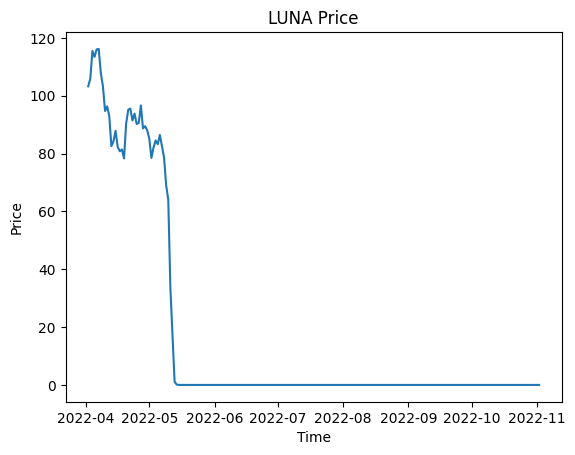

In [8]:
plt.plot(wluna["datetime"],wluna['open'])
plt.title("LUNA Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

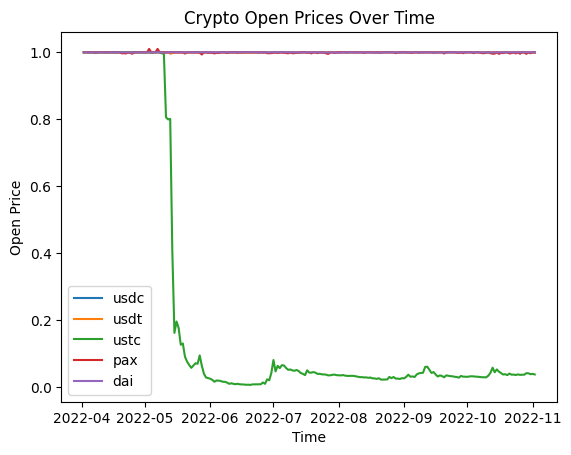

In [9]:
x = openprices['datetime']

# Columns to plot (all except 'datetime')
cryptos = ['usdc', 'usdt', 'ustc', 'pax', 'dai']

for crypto in cryptos:
    plt.plot(x, openprices[crypto], label=crypto)

plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Crypto Open Prices Over Time')
plt.legend()
plt.show()


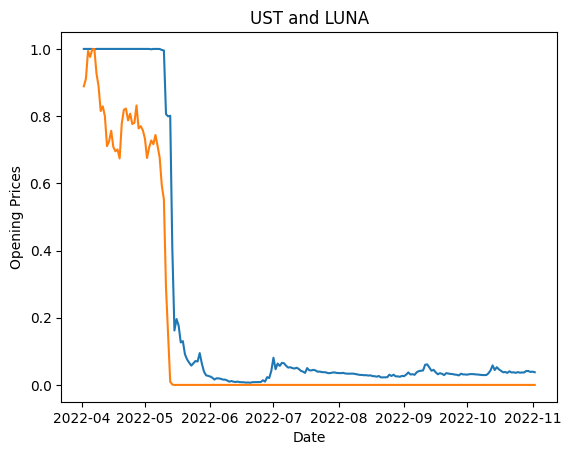

In [10]:
wluna_norm = (wluna.open - wluna.open.min()) / (wluna.open.max() - wluna.open.min())

plt.plot(ustc.datetime, ustc.open, label = "UST")
plt.plot(wluna.datetime, wluna_norm, label = "LUNA")
plt.title("UST and LUNA")
plt.xlabel("Date")
plt.ylabel("Opening Prices")
plt.show()

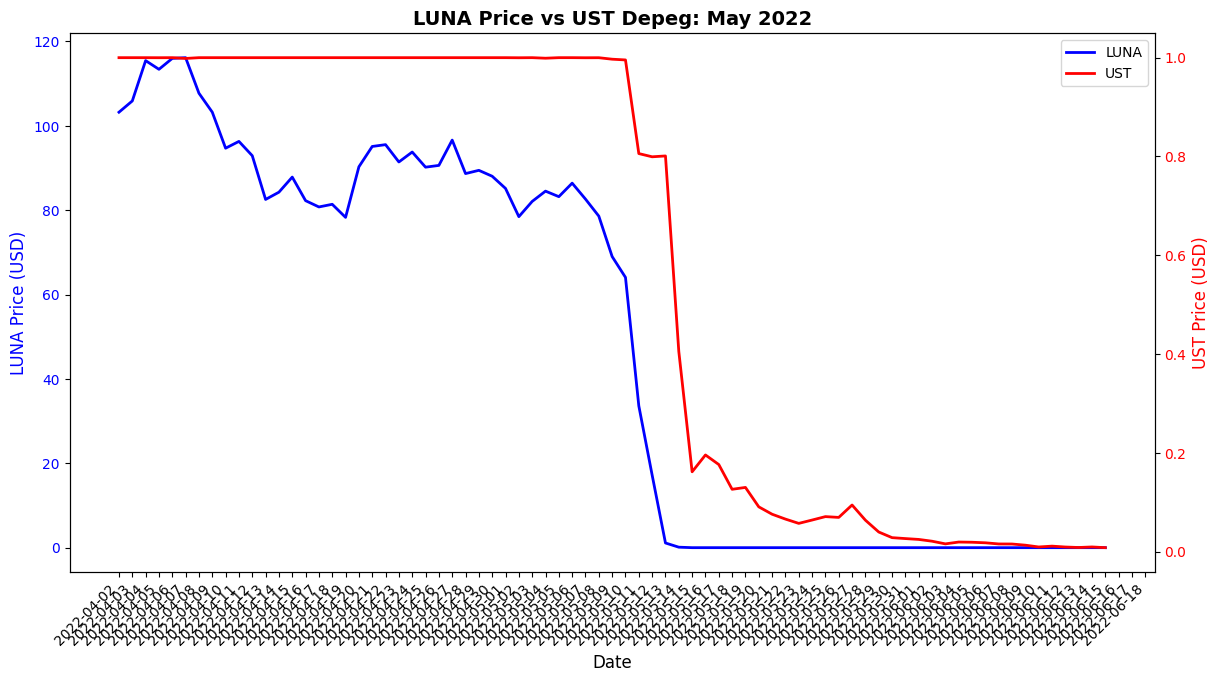

In [22]:
fig, ax1 = plt.subplots(figsize = (14, 7))
ax2 = ax1.twinx()

ax1.plot(wluna.datetime[:75], wluna.open[:75], 'b-', linewidth = 2, label = 'LUNA')
ax1.set_ylabel('LUNA Price (USD)', color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(wluna['datetime'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right') 

ax2.plot(ustc.datetime[:75], ustc.open[:75], 'r-', linewidth = 2, label = "UST")
ax2.set_ylabel('UST Price (USD)', color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')

plt.title('LUNA Price vs UST Depeg: May 2022', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

Text(0.5, 1.0, 'PAX Price')

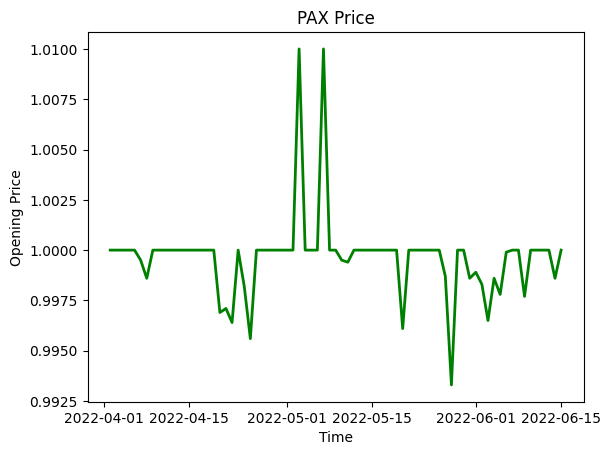

In [12]:
plt.plot(pax.datetime[:75], pax.open[:75],'-g', linewidth = 2, label = "PAX")
plt.ylabel("Opening Price")
plt.xlabel("Time")
plt.title("PAX Price")

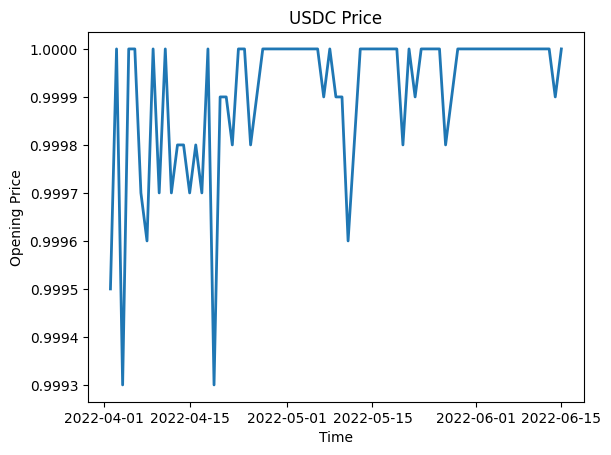

In [13]:
plt.plot(usdc.datetime[:75], usdc.open[:75], linewidth = 2, label = "USDC")
plt.ylabel("Opening Price")
plt.xlabel("Time")
plt.title("USDC Price")
plt.show()

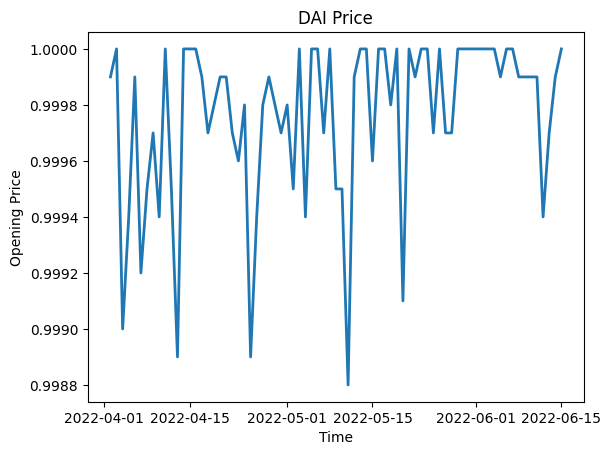

In [14]:
plt.plot(dai.datetime[:75], dai.open[:75], linewidth = 2, label = "DAI")
plt.ylabel("Opening Price")
plt.xlabel("Time")
plt.title("DAI Price")
plt.show()

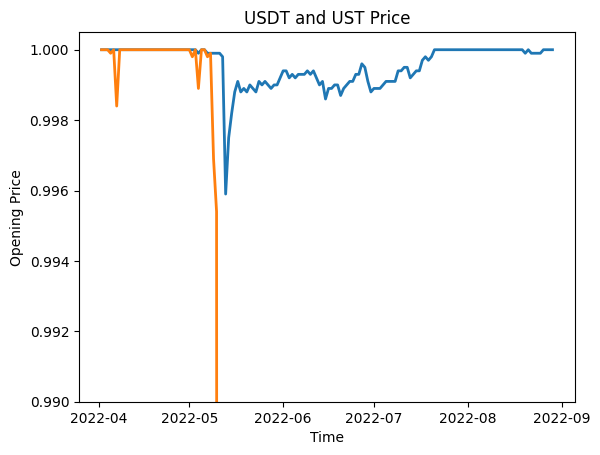

In [15]:
plt.plot(usdt.datetime[:150], usdt.open[:150], linewidth = 2, label = "USDT")
plt.plot(ustc.datetime[:150], ustc.open[:150], linewidth = 2, label = "UST")
plt.ylim(0.99, 1.0005)  
plt.ylabel("Opening Price")
plt.xlabel("Time")
plt.title("USDT and UST Price")
plt.show()

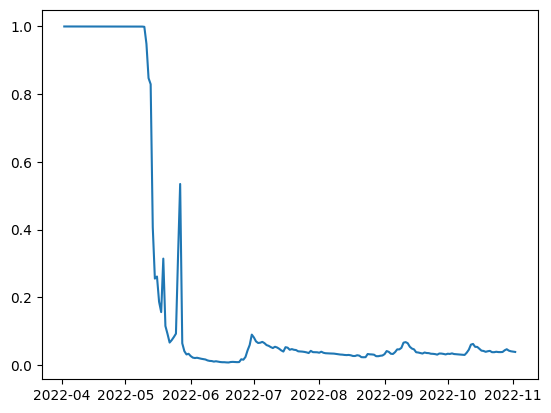

In [ ]:
plt.plot(ustc.datetime, ustc.high)
plt.show()

Question: How far does UST trade from 1USD over time

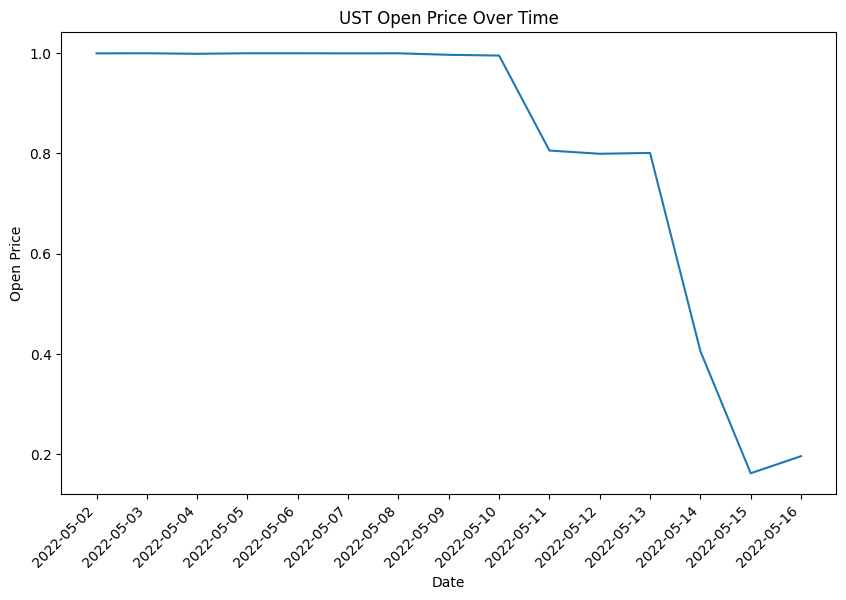

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(ustc['datetime'][30:45], ustc['open'][30:45])
plt.xticks(ustc['datetime'][30:45], rotation = 45, ha = 'right')
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("UST Open Price Over Time")

plt.show()

Calculate rolling standard deviation or daily % changes

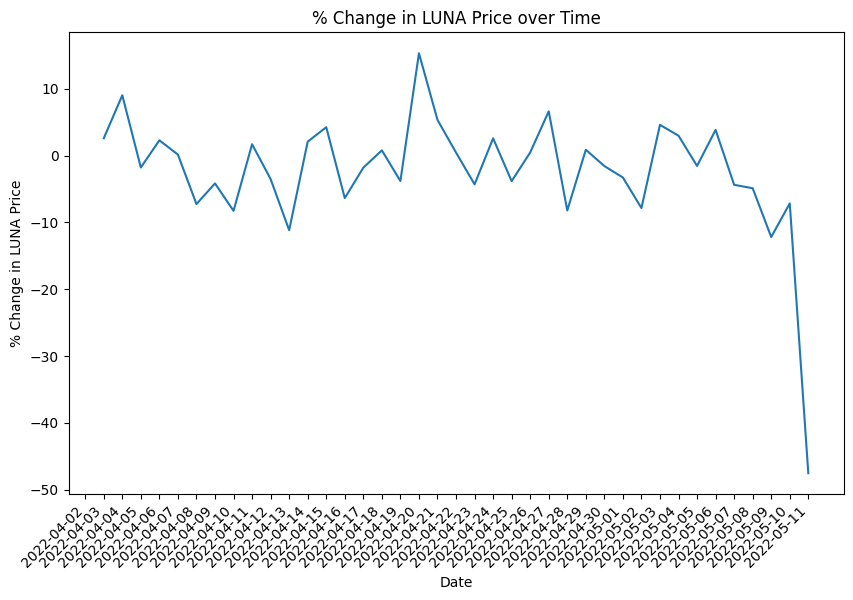

In [49]:
luna_pct = wluna['open'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(wluna['datetime'][:40],luna_pct[:40])
plt.xticks(wluna['datetime'][:40], rotation = 45, ha = 'right')
plt.xlabel("Date")
plt.ylabel("% Change in LUNA Price")
plt.title("% Change in LUNA Price over Time")
plt.show()

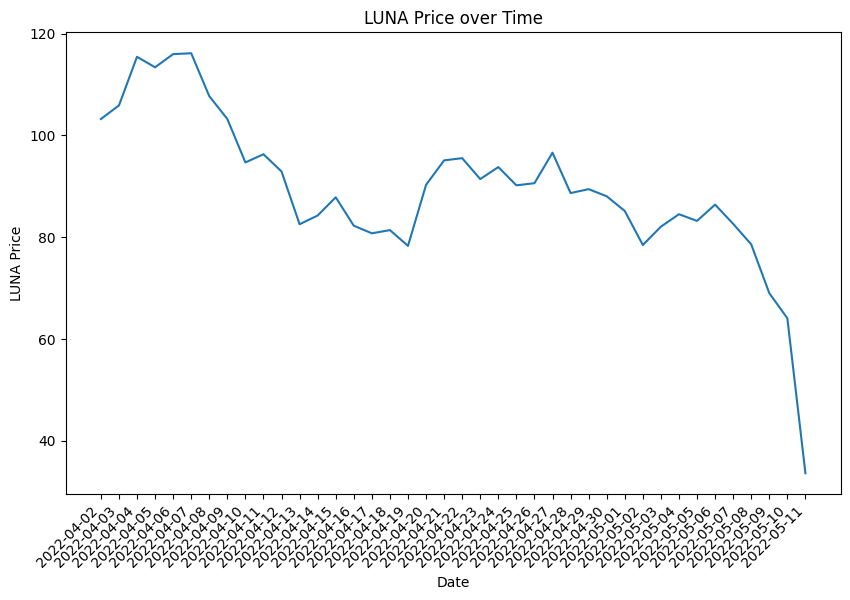

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(wluna['datetime'][:40],wluna['open'][:40])
plt.xticks(wluna['datetime'][:40], rotation = 45, ha = 'right')
plt.xlabel("Date")
plt.ylabel("LUNA Price")
plt.title("LUNA Price over Time")
plt.show()

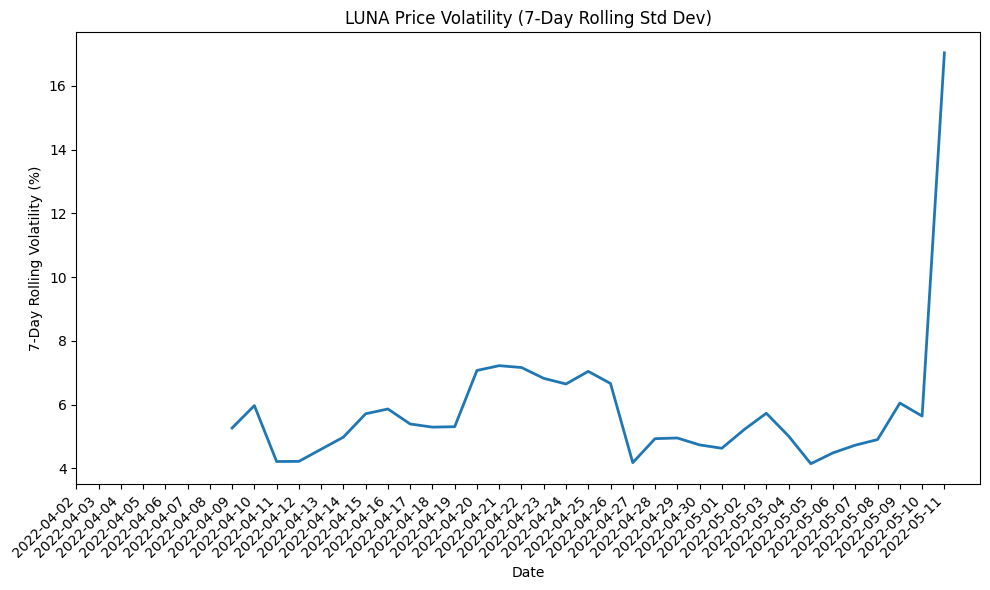

In [54]:
# Calculate rolling std dev of returns over a window (e.g., 7 days)
wluna_returns = wluna['open'][:40].pct_change()
rolling_volatility = wluna_returns.rolling(window=7).std() * 100

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(wluna['datetime'][:40], rolling_volatility, linewidth=2)
plt.ylabel('7-Day Rolling Volatility (%)')
plt.xlabel('Date')
plt.title('LUNA Price Volatility (7-Day Rolling Std Dev)')
plt.xticks(wluna['datetime'][:40],rotation=45, ha='right')
plt.tight_layout()
plt.show()

Contagion to other stablecoins - Do DAI, USDT, USDC, PAX also show peg deviations during the same period? Plot them together

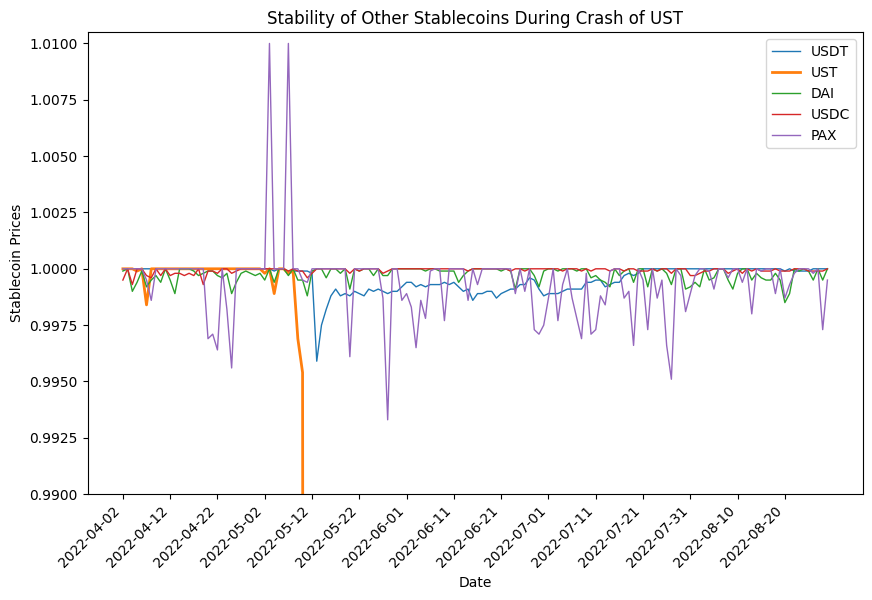

In [82]:
plt.figure(figsize=(10,6))
plt.plot(usdt.datetime[:150], usdt.open[:150], linewidth = 1, label = "USDT")
plt.plot(ustc.datetime[:150], ustc.open[:150], linewidth = 2, label = "UST")
plt.plot(dai.datetime[:150], dai.open[:150], linewidth = 1, label = "DAI")
plt.plot(usdc.datetime[:150], usdc.open[:150], linewidth = 1, label = "USDC")
plt.plot(pax.datetime[:150], pax.open[:150], linewidth = 1, label = "PAX")
plt.xticks(usdt.datetime[:150:10],rotation=45, ha = 'right')
plt.ylim(0.99, 1.0105)  
plt.xlabel("Date")
plt.ylabel("Stablecoin Prices")
plt.title("Stability of Other Stablecoins During Crash of UST")
plt.legend()
plt.show()